In [ ]:
!pip install kaggle
!pip install tensorflow

In [ ]:
# Use gpu to train
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
#conn to gdrive
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle

#unzipping the zip files and deleting the zip files
!kaggle datasets download -d joyee19/studentengagement
!unzip \*.zip  && rm *.zip


Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content
Dataset URL: https://www.kaggle.com/datasets/joyee19/studentengagement
License(s): unknown
100% 38.3M/38.3M [00:03<00:00, 17.6MB/s]
100% 38.3M/38.3M [00:03<00:00, 11.9MB/s]
Archive:  studentengagement.zip
  inflating: Student-engagement-dataset/Engaged/confused/0020.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0021.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0032.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0033.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0034.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0035.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0036.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0037.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0038.jpg  
  inflating: Student-engagement-dataset/Engaged/confused/0039.jpg  
  inflat

In [ ]:
!mv /content/Student-engagement-dataset dataset
!cp -r dataset /content/gdrive/My\ Drive/Kaggle


mv: cannot stat '/content/Student-engagement-dataset': No such file or directory


In [ ]:
!rm -R "/content/gdrive/My Drive/Kaggle/"

In [ ]:
!rm -R "/content/gdrive/My Drive/Kaggle/dataset/test" "/content/gdrive/My Drive/Kaggle/dataset/train"

In [ ]:
!mv /content/gdrive/My\ Drive/Kaggle/dataset/Engaged/* /content/gdrive/My\ Drive/Kaggle/dataset


In [ ]:
!mv /content/gdrive/My\ Drive/Kaggle/dataset/Not\ engaged/* /content/gdrive/My\ Drive/Kaggle/dataset

In [ ]:
!rm -R /content/gdrive/My Drive/Kaggle/dataset/Engaged /content/gdrive/My Drive/Kaggle/dataset/Not\ engaged

rm: cannot remove '/content/gdrive/My': No such file or directory
rm: cannot remove 'Drive/Kaggle/dataset/Engaged': No such file or directory
rm: cannot remove '/content/gdrive/My': No such file or directory
rm: cannot remove 'Drive/Kaggle/dataset/Not engaged': No such file or directory


In [ ]:
import os
import shutil
import random

def create_train_test_dirs(data_dir, train_dir, test_dir, test_ratio=0.2):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for subclass in os.listdir(data_dir):
        subclass_path = os.path.join(data_dir, subclass)
        if not os.path.isdir(subclass_path):
            continue

        images = [f for f in os.listdir(subclass_path) if os.path.isfile(os.path.join(subclass_path, f))]
        random.shuffle(images)

        split_idx = int(len(images) * test_ratio)
        test_images = images[:split_idx]
        train_images = images[split_idx:]

        train_subclass_path = os.path.join(train_dir, subclass)
        test_subclass_path = os.path.join(test_dir, subclass)

        if not os.path.exists(train_subclass_path):
            os.makedirs(train_subclass_path)
        if not os.path.exists(test_subclass_path):
            os.makedirs(test_subclass_path)

        for image in train_images:
            shutil.copy(os.path.join(subclass_path, image), train_subclass_path)

        for image in test_images:
            shutil.copy(os.path.join(subclass_path, image), test_subclass_path)

# Define paths
base_dir = '/content/gdrive/My Drive/Kaggle'
data_dir = os.path.join(base_dir, 'dataset')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

create_train_test_dirs(data_dir, train_dir, test_dir)


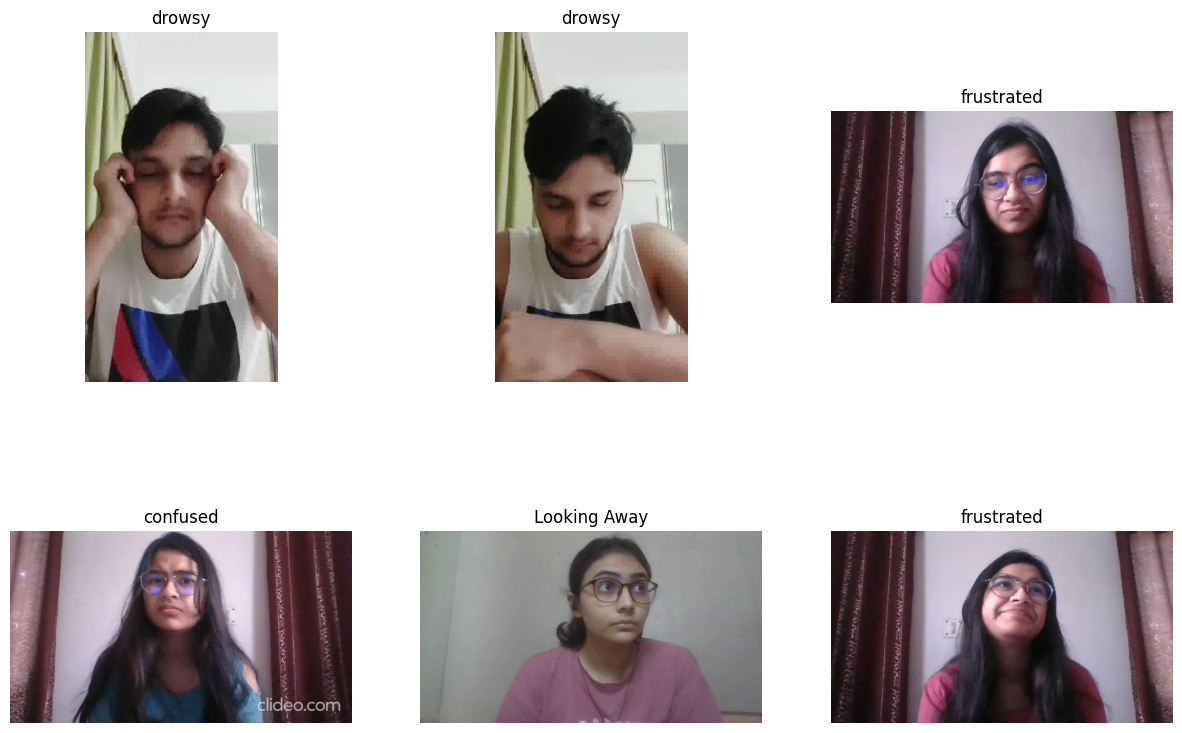

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Define paths
train_dir = '/content/gdrive/My Drive/Kaggle/train'
test_dir = '/content/gdrive/My Drive/Kaggle/test'

# Get a list of classes
classes = os.listdir(train_dir)

# Select 6 random images and their classes
num_images = 6
selected_images = []
for _ in range(num_images):
    random_class = random.choice(classes)
    class_path = os.path.join(train_dir, random_class)
    image_files = os.listdir(class_path)
    random_image = random.choice(image_files)
    selected_images.append((os.path.join(class_path, random_image), random_class))

# Display the images
plt.figure(figsize=(15, 10))
for i, (image_path, class_name) in enumerate(selected_images):
    plt.subplot(2, 3, i + 1)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for loading and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


Found 1362 images belonging to 6 classes.
Found 337 images belonging to 6 classes.
Found 421 images belonging to 6 classes.


In [ ]:
# remove ipynb checkpoints
!rm -R /content/gdrive/My\ Drive/Kaggle/dataset/train/.ipynb_checkpoints /content/gdrive/My\ Drive/Kaggle/dataset/test/.ipynb_checkpoints

rm: cannot remove '/content/gdrive/My Drive/Kaggle/dataset/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/gdrive/My Drive/Kaggle/dataset/test/.ipynb_checkpoints': No such file or directory


In [ ]:
print(test_generator.class_indices)


{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10
42/42 [==============================] - 584s 14s/step - loss: 1.4225 - accuracy: 0.5173 - val_loss: 0.7533 - val_accuracy: 0.7500
Epoch 2/10
42/42 [==============================] - 21s 496ms/step - loss: 0.4158 - accuracy: 0.8323 - val_loss: 0.5189 - val_accuracy: 0.7594
Epoch 3/10
42/42 [==============================] - 18s 428ms/step - loss: 0.2059 - accuracy: 0.9211 - val_loss: 0.5821 - val_accuracy: 0.8094
Epoch 4/10
42/42 [==============================] - 20s 486ms/step - loss: 0.1548 - accuracy: 0.9338 - val_loss: 0.5860 - val_accuracy: 0.8344
Epoch 5/10
42/42 [==============================] - 20s 471ms/step - loss: 0.1426 - accuracy: 0.9346 - val_loss: 0.6910 - val_accuracy: 0.8062
Epoch 6/10
42/42 [==============================] - 17s 417ms/step - loss: 0.1244 - accuracy: 0.9406 - val_loss: 0.6024 - val_accuracy: 0.8500
Epoch 7/10
42/42 [==============================] - 20s 471ms/step - loss: 0.1246 - accuracy: 0.9421 - val_loss: 0.6378 - val_accuracy: 0.8406


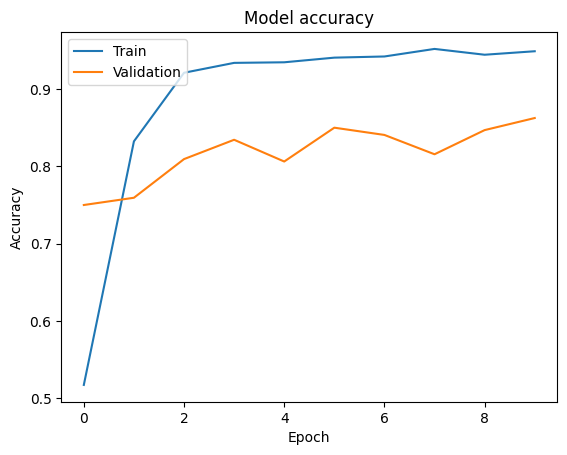

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


11/11 [==============================] - 4s 337ms/step - loss: 0.5674 - accuracy: 0.8576
Validation Accuracy: 85.76%
14/14 [==============================] - 149s 11s/step - loss: 0.1271 - accuracy: 0.9501
Test Accuracy: 95.01%


14/14 [==============================] - 4s 245ms/step


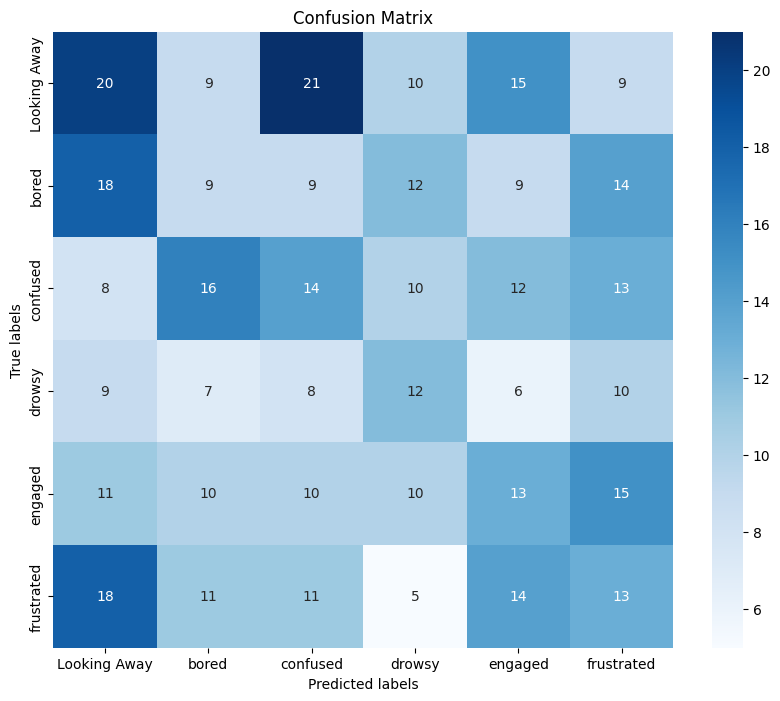

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Get true labels and predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)


{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}
{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}
{'Looking Away': 0, 'bored': 1, 'confused': 2, 'drowsy': 3, 'engaged': 4, 'frustrated': 5}


1/1 [==============================] - 0s 17ms/step


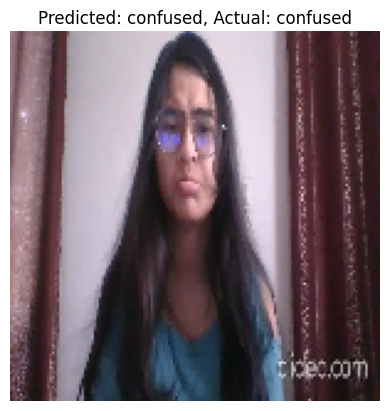

In [ ]:
# get random image from test folder and try to predict using the model
import matplotlib.pyplot as plt
# Get a random image from the test folder
import numpy as np
from tensorflow.keras.preprocessing import image

random_class = random.choice(classes)
class_path = os.path.join(test_dir, random_class)
image_files = os.listdir(class_path)
random_image_file = random.choice(image_files)
random_image_path = os.path.join(class_path, random_image_file)

# Load and preprocess the image
img = image.load_img(random_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

list_classes = list(train_generator.class_indices.keys())

# Make prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_class = list_classes[predicted_class_index]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}, Actual: {random_class}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 17ms/step


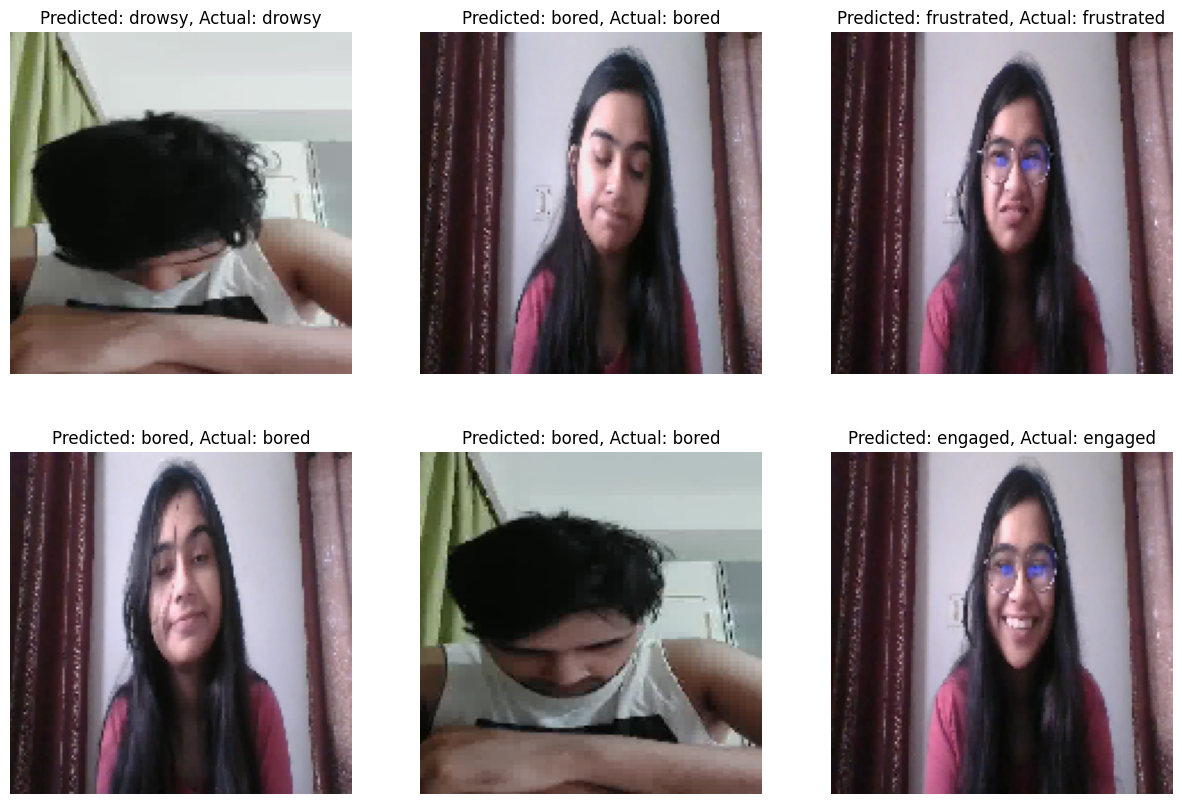

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Get 8 random images
num_images = 6
selected_images = []
for _ in range(num_images):
    random_class = random.choice(classes)
    class_path = os.path.join(test_dir, random_class)
    image_files = os.listdir(class_path)
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)
    selected_images.append((random_image_path, random_class))

# Predict the classes of the selected images
plt.figure(figsize=(15, 10))
for i, (image_path, true_class) in enumerate(selected_images):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = list_classes[predicted_class_index]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 19ms/step


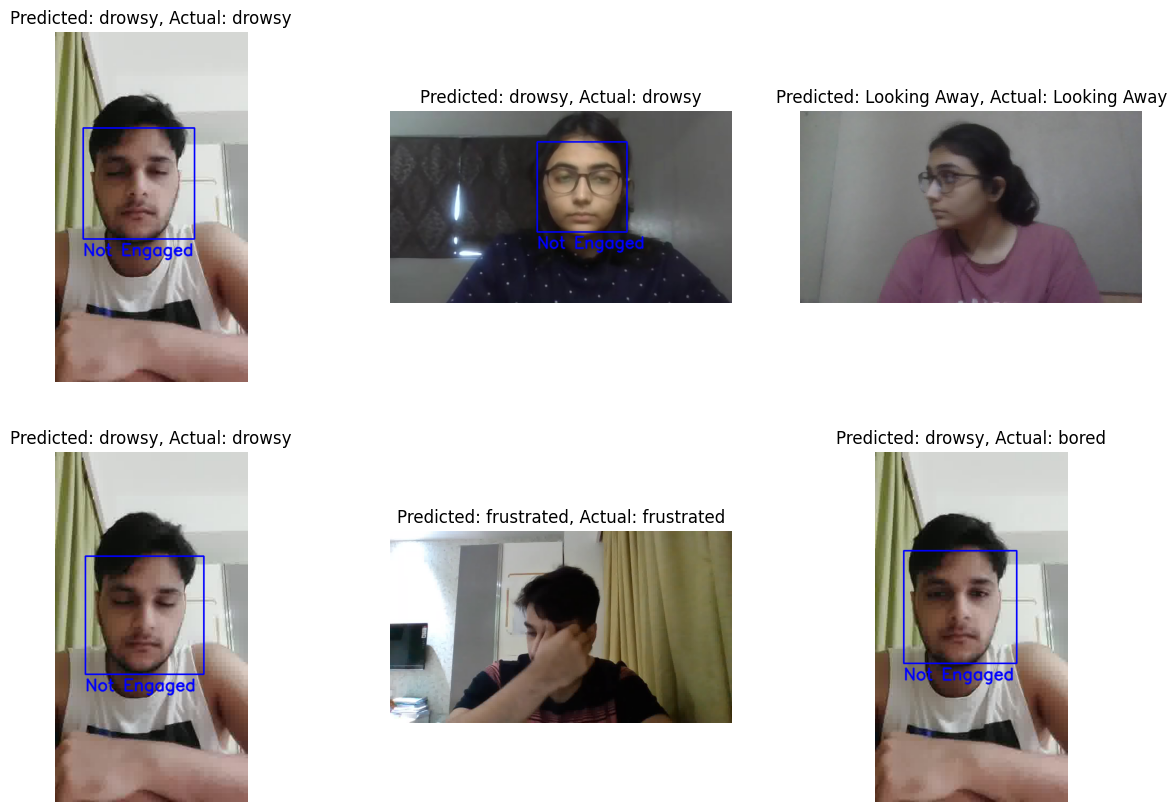

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function to draw rectangle and text on image
def draw_prediction(image_path, predicted_class):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    if predicted_class in ['confused', 'engaged', 'frustated']:
      text = "Engaged"
    else:
      text = "Not Engaged"
    cv2.putText(img, text, (x, y+h+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

  return img

# Get 8 random images from the test folder and predict their classes
num_images = 6
selected_images = []
for _ in range(num_images):
    random_class = random.choice(classes)
    class_path = os.path.join(test_dir, random_class)
    image_files = os.listdir(class_path)
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)
    selected_images.append((random_image_path, random_class))

# Predict the classes of the selected images and draw predictions
plt.figure(figsize=(15, 10))
for i, (image_path, true_class) in enumerate(selected_images):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = list_classes[predicted_class_index]

    # Draw prediction on image
    img_with_prediction = draw_prediction(image_path, predicted_class)

    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_with_prediction, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 22ms/step


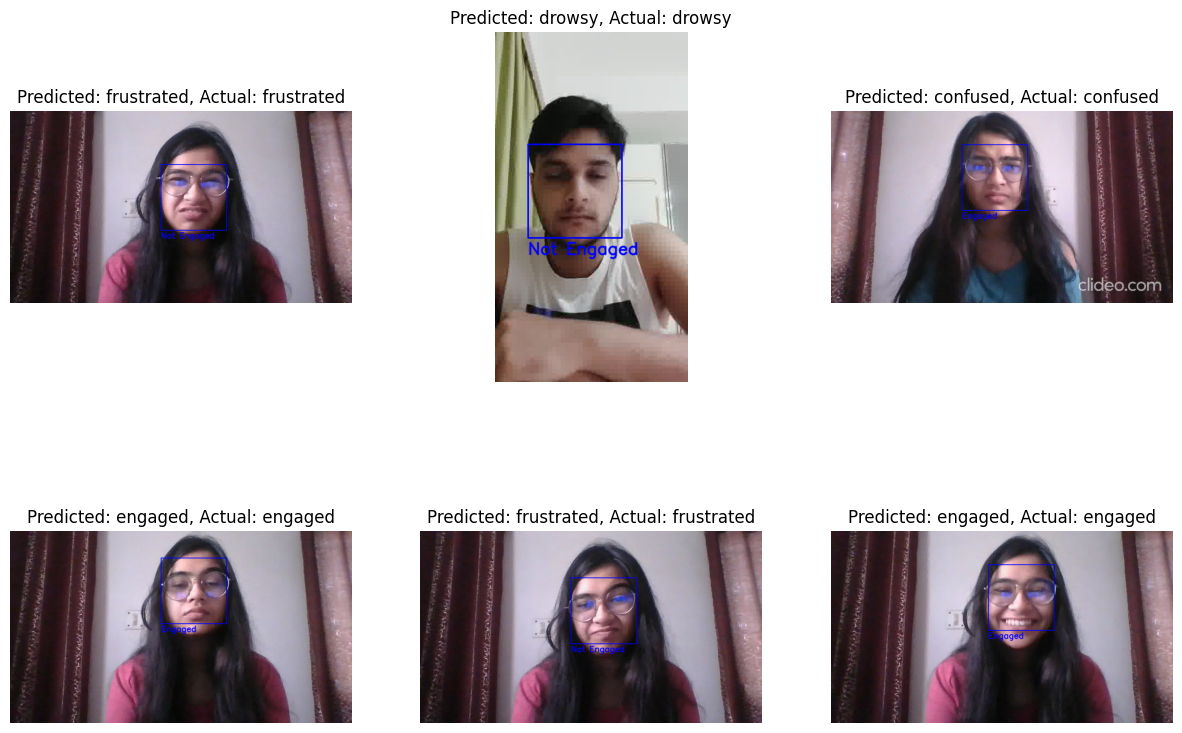

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
import random
import os
from keras.preprocessing import image

# Function to draw rectangle and text on image
def draw_prediction(image_path, predicted_class):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use dlib's CNN-based face detector
    detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
    faces = detector(gray, 1)

    for face in faces:
        x, y, w, h = (face.rect.left(), face.rect.top(), face.rect.width(), face.rect.height())
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        if predicted_class in ['confused', 'engaged', 'frustated']:
            text = "Engaged"
        else:
            text = "Not Engaged"
        cv2.putText(img, text, (x, y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    return img


# Get 8 random images from the test folder and predict their classes
num_images = 6
selected_images = []
for _ in range(num_images):
    random_class = random.choice(classes)
    class_path = os.path.join(test_dir, random_class)
    image_files = os.listdir(class_path)
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)
    selected_images.append((random_image_path, random_class))

# Predict the classes of the selected images and draw predictions
plt.figure(figsize=(15, 10))
for i, (image_path, true_class) in enumerate(selected_images):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = list_classes[predicted_class_index]

    # Draw prediction on image
    img_with_prediction = draw_prediction(image_path, predicted_class)

    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_with_prediction, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
    plt.axis('off')

plt.show()


In [ ]:
model.save('expression_model.h5')


In [ ]:
model_save_path = '/content/gdrive/My Drive/Kaggle/expression_model.h5'
model.save(model_save_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
